# Inleiding

In deze opdracht gaan jullie je scripts van vorige week verbeteren en uitbreiden. Dat gezegd, hebben we liever dat je ingeleverd Jupyter Notebook bestanden niet super lang worden, dus in plaats van het toevoegen van nieuwen cellen in jullie bestanden van Opdracht 1, gebruik alsjeblieft deze sjabloon als basis. Dan, in de relevante plekken, alleen de cellen van de vorige opdracht die echt voor deze opdracht nodig zijn kopie/plakken. Bijvoorbeeld, hoewel dataverkenning toch belangrijk is, hebben jullie hopelijk al genoeg daarvan gedaan, en dus is het niet nodig om die code en plotjes hierbij ook te hebben. 

Hier is een lijst van de elementen die je waarschijnlijk willen overdragen:
1. het inlezen/splitsen van jouw datasets
2. de definitieve versie van jouw regressie/classificatie modellen (niet de voorbereiding stappen)
3. blijf dezelfde twee gekozen algoritmes gebruiken

Let op: In tegenstelling tot de eerste opdracht, voor deze en de resterende 2 opdrachten worden jullie peer reviews alleen beoordeeld op een ja of nee basis. 

Zoals geschreven in de vakbeschrijving:

"Het niet op tijd of lui maken van een individuele peer review resulteert in een reductie van 0,5 punt voor het cijfer van de bijhorende opdracht van de reviewer."

Gezien dat jullie peer reviews zijn sowieso kwalitatief beoordeeld voor Opdracht 1, is deze halfpunt reductie alleen voor Opdrachten 2 t/m 4 geldig. 

### Algemene Coderen Conventies

De volgorde van het python script is belangrijk. Zo zorg je bijvoorbeeld altijd dat eerst de benodigde packages worden ingeladen geïnstalleerd en geïmporteerd). Verder is het goed om van tevoren jouw working directory te controleren. 

Schrijf het python script daarom met een duidelijke indeling van met verschillende stappen. Bij elke stap dient toelichting worden gegeven:
1. Wat is het doel van deze stap?
2. Wat is de input van deze stap?
3. Wat is de output van deze stap en waar heb je deze output hierna nog nodig?

Hieronder voorbeelden van de verschillende punten hierboven.

In [ ]:
### Voorbeeld: Standaard Imports
import numpy as np
import matplotlib.pyplot as plt


### Controleer Working Directory
import os
print(os.getcwd())

# Pas je working directory aan indien gewenst
path = path = '/Users/jaristellaart/Documents/GitHub/Smart_Industry/Data Mining/Opdracht 2'
 # zet hier wat voor jou goed is
os.chdir(path)
print(os.getcwd())


### Voorbeeld: Functie met Beschrijving Schrijven

def voorbeeld_functie(parameter1, parameter2 = 2):
    # Doel: dit functie maakt een bepaalde berekening
    # In: parameter1 (float), parameter2 (integer)
    # Uit: parameter1 macht parameter2 (standaard macht 2)
    
    return parameter1 ** parameter2

/Users/jaristellaart/Documents/GitHub/Smart_Industry/Data Mining/Opdracht 2
/Users/jaristellaart/Documents/GitHub/Smart_Industry/Data Mining/Opdracht 2


In [39]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Deelopdracht 1/2 - Regressie Model (Huizenprijzen)

Let op: de bedoeling is dat jullie hetzelfde regressie algoritme van Opdracht 1 blijven gebruiken (dus niet een nieuwe). 

### Theorievragen

Kies twee verschillende prestatiemetrics voor jouw gekozen regressie algoritme.
Begin met het beantwoorden van een aantal vragen over deze prestatiemetrics.

1. Waarom heb je deze prestatiemetrics gekozen?

Ik heb Mean Absolute Error (MAE) en Mean Squared Error (MSE) gekozen omdat ze elkaar goed aanvullen en een duidelijk beeld geven van hoe goed het regressiemodel presteert bij het voorspellen van huizenprijzen.

MAE geeft aan hoe ver de voorspellingen gemiddeld van de werkelijke prijzen af liggen, zonder onderscheid te maken tussen kleine en grote fouten. Dit maakt het een intuïtieve en robuuste maat die goed werkt bij datasets met uitschieters.
MSE daarentegen straft grotere fouten zwaarder, omdat de fout wordt gekwadrateerd. Dit is vooral nuttig als grote afwijkingen onwenselijk zijn — bijvoorbeeld bij huizenprijzen waarbij een fout van €100.000 veel erger is dan een fout van €10.000.
Door beide te gebruiken krijg je een evenwichtige evaluatie:

MAE vertelt je hoe ver je er gemiddeld naast zit,
MSE laat je zien of er (grote) uitschieters in de fouten zitten.
Zo kan ik beter beoordelen of mijn model stabiel en betrouwbaar is, en of er ruimte is voor verbetering.

2. Wat zijn de voor- en nadelen van de eerste prestatiemetric?

Voordelen van MAE:

Intuïtief en makkelijk te interpreteren: MAE geeft direct het gemiddelde verschil tussen de voorspellingen en de werkelijke waarden, in dezelfde eenheid als de target (bijvoorbeeld euro’s bij huizenprijzen).
Robuust voor uitschieters: Omdat MAE alleen de absolute waarde van fouten gebruikt (dus niet kwadrateert), wordt het minder beïnvloed door een paar extreem hoge of lage fouten.
Eerlijk voor alle fouten: Elke fout telt even zwaar mee in de berekening, ongeacht hoe groot die fout is.

Nadelen van MAE:

Geen extra straf voor grote fouten: Grote fouten worden even zwaar meegewogen als kleine fouten. Dit kan onwenselijk zijn als je model vooral grote fouten moet vermijden.
Moeilijk te optimaliseren bij sommige algoritmes: In tegenstelling tot MSE, is MAE minder glad (niet differentieerbaar in het midden), wat bij sommige modellen of optimalisatie-algoritmes (zoals bij gradient descent) lastig kan zijn.

Kortom, MAE is een goede metric voor een algemeen overzicht van de prestaties, maar als grote fouten zwaar moeten meewegen, is MSE een betere aanvulling.

3. Wat zijn de voor- en nadelen van de tweede prestatiemetric?

Voordelen van MSE:

Straft grote fouten zwaarder: Omdat fouten worden gekwadrateerd, krijgen grote afwijkingen meer gewicht. Dit is handig als je model vooral grote fouten moet vermijden (zoals bij dure huizen).
Wiskundig geschikt voor optimalisatie: MSE is differentieerbaar, wat het makkelijker maakt voor veel machine learning algoritmes om te optimaliseren met behulp van technieken zoals gradient descent.
Veelgebruikt en standaardmetric in veel modellen zoals lineaire regressie en neurale netwerken, waardoor het goed te vergelijken is met andere resultaten.

Nadelen van MSE:

Gevoelig voor uitschieters: Doordat fouten worden gekwadrateerd, kunnen een paar grote fouten de score sterk beïnvloeden en het model een te negatief beeld geven.
Moeilijker te interpreteren: Omdat fouten worden gekwadrateerd, is de MSE niet meer in dezelfde eenheid als de targetvariabele (bijvoorbeeld euro’s), wat de interpretatie minder intuïtief maakt dan MAE.

Samengevat, MSE is krachtig wanneer het belangrijk is om grote fouten te beperken, maar kan te streng zijn in datasets met natuurlijke variatie of outliers.

#### Beantwoord nu een aantal vragen over hyperparameters voor jouw gekozen regressie algoritme.

4. Welke hyperparameters in je model kun je instellen (aan welke knoppen kan je draaien)? 

5. Leg uit wat een verandering van de waarde met het model doet.

6. Wat zouden logische waarden kunnen zijn?

## Code

Zoals bij Opdracht 1, voor het regressie model kunnen jullie deze dataset gebruiken:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Als je het niet al hebben gedaan, splits je dataset in een train en een test (validatie) set.

### Prestatiemetrics

Bereken 2 prestatiemetrics op de traindata en op de testdata. Zijn er grote verschillen? Zo ja, hoe zou dat kunnen komen?

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"De prestatiemetrics van de modellen zijn berekend. Er wordt toegelicht wat waarde van de metric betekend. Voordelen en nadelen van de gekozen metrics worden benoemd."

Let op: Je kan deze vraag (en soortgelijke vragen hieronder) beantwoorden via zowel aanvullende Markdown cellen (voor tekstuele antwoorden) als Code cellen (voor jouw code zelf, met commentaar erbij). Gebruik gewoon wat je het best helpt om de vraag te beantwoorden. 

(voorbeeld Markdown cell)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dataset inladen 
data = pd.read_csv("train.csv")

numeric_data = data.select_dtypes(include='number').dropna(axis=1)

X = numeric_data.drop("SalePrice", axis=1)
y = numeric_data["SalePrice"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineair regressiemodel trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# MAE en MSE op train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# MAE en MSE op test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MAE: {mae_train:.2f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MAE:  {mae_test:.2f}")
print(f"Test MSE:  {mse_test:.2f}")




Train MAE: 21063.87
Train MSE: 1171665128.10
Test MAE:  22959.21
Test MSE:  1393346690.33


Wat betekenen deze scores?
- MAE (Mean Absolute Error) geeft het gemiddelde verschil tussen de voorspelde huizenprijzen en de werkelijke prijzen.
- MSE (Mean Squared Error) is vergelijkbaar, maar grotere fouten worden zwaarder bestraft doordat de afwijking wordt gekwadrateerd.

Zijn er grote verschillen tussen train en test?
- Als MAE/MSE op de testset veel hoger is dan op de trainset, is dat een teken van overfitting: het model heeft te goed geleerd op de trainingsdata, maar generaliseert slecht naar nieuwe data.
- Als beide scores vrijwel gelijk zijn, is het model goed gebalanceerd.

De MAE en MSE zijn beide berekend voor de trainings- en testdata. We zien dat:

- De scores op de trainingsdata iets beter (lager) zijn dan op de testdata, wat normaal is.
- Het verschil tussen de train- en testscore is echter niet extreem groot, wat erop wijst dat het model niet sterk overfit is.
- De voorspellingen zijn dus redelijk accuraat, en het model generaliseert goed naar nieuwe, ongeziene data.

Als de scores op de testset veel slechter waren geweest, zou dat kunnen betekenen dat het model te complex is, of dat we extra regularisatie of feature selectie nodig hebben.



### K-Fold Cross Validatie

Pas k-fold cross validation toe op de traindataset. Zie ook: https://scikit-learn.org/stable/modules/cross_validation.html

In [4]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Cross-validation uitvoeren
mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=mse_scorer)

# Gemiddelde scores (omzetten naar positief voor interpretatie)
print(f"Gemiddelde MAE (cv): {-np.mean(mae_scores):.2f}")
print(f"Gemiddelde MSE (cv): {-np.mean(mse_scores):.2f}")


Gemiddelde MAE (cv): 22403.02
Gemiddelde MSE (cv): 1412740283.93


Welke waarde van k kies je en waarom?

We hebben gekozen voor k = 5 bij de k-fold cross-validatie omdat dit een goede balans biedt tussen betrouwbaarheid en rekentijd. Bij k = 5 wordt de dataset in vijf gelijke delen gesplitst, waarbij elke keer één deel als testset fungeert en de overige vier delen worden gebruikt om het model te trainen. Dit zorgt voor een stabiele en betrouwbare inschatting van de modelprestaties, terwijl het niet te veel rekentijd kost. Voor onze middelgrote huizenprijzen-dataset met ongeveer 1400 observaties is dit ideaal: elke fold bevat voldoende data om valide evaluaties te maken, en het model wordt genoeg keren getraind om variatie in de resultaten te kunnen inschatten.

Lijkt het resultaat meer op de train of de testset?

Het resultaat lijkt meer op de trainingsset omdat het model met k-fold cross-validatie op de trainingsdata is geëvalueerd. Cross-validatie test het model op delen van de trainingsdata die het niet heeft gezien, waardoor de scores realistischer zijn dan puur trainen en testen op dezelfde data.

De prestaties op de aparte testset zullen meestal iets lager zijn, omdat die data nieuw is voor het model. Dus, het resultaat uit de cross-validatie lijkt het meest op de training, maar is een betere inschatting van hoe het model zal presteren op onbekende data dan alleen trainen zonder validatie.

### Underfit/Overfit

Maak een underfit model (slechte prestaties op train en test) en een overfit model (veel betere prestaties op train vergeleken met test). Leg uit (via tekst en een of meer visualisaties) hoe je dit kan zien.

Let op: je maakt hier expres slechte modellen om te zien hoe veel controle over het presteren van het model je kan krijgen en te leren wat de verschillende hyperparameters kunnen opleveren. 

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Het is gelukt om een underfit- een overfitmodel te maken en er wordt duidelijk uitgelegd waaraan je dat kan zien. De rol van de train en testset wordt duidelijk uitgelegd. De resultaten worden onderbouwd met goede vizualisaties."

(beantwoord als Markdown)

### Gridsearch

Pas GridSearchCV() toe op je model in scikit-learn, hiermee kan je de beste waarde voor je hyperparameters vinden. Let op: voor maximale punten moet je ook K-Fold Cross Validatie tegelijk gebruiken (wss in een pipeline...zie DataCamp).

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is GridSearchCV() uitgevoerd en er wordt beargumenteerd waarom gekozen is voor bepaalde hyperparameters. Ook wordt benoemd welke hyperparameter uiteindelijk het beste lijkt te zijn en waarom, en er is besproken hoe k-foldcross validatie betrokken wordt in de GridSearchCV()."

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

### Definitief Model (Regressie)

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er worden uitspraken gedaan over hoe goed de modellen werken. De onderbouwing is duidelijk en logisch. Ook is beargumenteerd waarom het model niet under- en overfit. Daarnaast komt naar voren waarom bepaalde features wel en niet in het uiteindelijke model zitten."

Test het model met de beste parameters op de testset. Hoe goed is het model?

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

Upload de voorspelling naar Kaggle. Is de score volgens verwachting?

(beantwoord als Markdown)

# Deelopdracht 2/2 - Classificatie Model (Borstkanker)

Let op: de bedoeling is dat jullie hetzelfde classificatie algoritme van Opdracht 1 blijven gebruiken (dus niet een nieuwe). 

### Theorievragen

Kies twee verschillende prestatiemetrics voor jouw gekozen classificatie algoritme.
Begin met het beantwoorden van een aantal vragen over deze prestatiemetrics.

1. Waarom heb je deze prestatiemetrics gekozen?

* Confusion Matrix: met een confusion matrix krijg je een overzichtelijk plaatje van alle correct- en incorrecte voorspellingen.
* Recall: ik wil alle patienten met borstkanker kunnen detecteren.

2. Wat zijn de voor- en nadelen van de eerste prestatiemetric?

Voordelen:
- Het geeft veel informatie, met de waardes uit de confusion matrix kun je ook de uitkomst van andere prestatiemetrics achterhalen. (Zoals Accuracy, Precision en F1 Score)
- Je kan het importeren als package, je hoeft dus zelf niet veel code hiervoor te schrijven.

Nadelen:
- De hoeveelheid informatie kan overweldigend zijn voor iemand die niet bekend is met een confusion matrix.
- De assen (Predicted & Actual values) kunnen soms omgedraaid zijn en dat kan tot verwarring brengen.

3. Wat zijn de voor- en nadelen van de tweede prestatiemetric?

Voordelen:
- Je kan het importeren als package, je hoeft dus zelf niet veel code hiervoor te schrijven.
- Het is 1 getal, in dit geval is het aantal correcte voorspellingen van borstkankerpatienten vergeleken met het werkelijke aantal borstkankerpatienten.

Nadelen:
- Het zegt niks over de naukeurigheid, de algoritme kan ook aangeven dat iemand borstkanker heeft terwijl diegene het niet heeft.

#### Beantwoord nu een aantal vragen over hyperparameters voor jouw gekozen classificatie algoritme.

4. Welke hyperparameters in je model kun je instellen (aan welke knoppen kan je draaien)? 

Hyperparameters van KNeighborsClassifier:
- n_neighbors
- weights
- algorithm
- leaf_size (geldt alleen voor algorithm = 'ball_tree' of 'kd_tree')
- p (deze werkt alleen als metric = 'minkowski')
- metric
- metric_params
- n_jobs

5. Leg uit wat een verandering van de waarde met het model doet.

* n_neighbors:
    dit is het aantal 'buren' waarin het model gaat vergelijken en voorspelling maken, met een kleine waarde wordt het model meer gevoelig voor ruis (maakt het model meer complex), en andersom verspreidt het model zich over meer datapunten (maakt het model minder complex).

* weights:
    hiermee bepaalt het model hoe 'zwaar' een buurtgenoot van een datapunt weegt tijdens het vergelijken, met het waarde 'uniform' krijg je overal dezelfde waarde en met 'distance' hebben buren die wat meer dichterbij zijn van het gegeven datapunt een hogere waarde.

* algorithm:
    dit is de type algoritme waarmee je model gaat gebruiken om alle buren te gaan verwerken, bij het veranderen van type algoritme kan het de schaalbaarheid en de snelheid beinvloeden.

* leaf_size:
    dit is het parameter dat gebruikt wordt binnen de type algoritme (met een boom-structuur) die de proces van het vormen van een boom kan versnellen. 

* p:
    dit is de parameter dat gebruikt wordt binnen de metric 'minkowski' om de afstand van de datapunten te berekenen.

* metric:
    dit is de type metric dat gebruikt wordt om afstanden te berekenen tussen de datapunten, hiermee verander je de methode waarmee je model de afstand tussen 2 datapunten berekent.

* metric_params:
    dit zijn de parameters die je model gebruikt binnen de metrics, hiermee kun je het gedrag van je model veranderen.

* n_jobs:
    aantal zoektochten die parallel lopen tijdens het zoeken van de buren, dit kan de prestatie van je zoektocht verbeteren.

6. Wat zouden logische waarden kunnen zijn?

## Code

Zoals bij Opdracht 1, voor het classificatie model kunnen jullie deze dataset gebruiken:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Als je het niet al hebben gedaan, splits je dataset in een train en een test (validatie) set.

### Prestatiemetrics

Bereken 2 prestatiemetrics op de traindata en op de testdata. Zijn er grote verschillen? Zo ja, hoe zou dat kunnen komen?

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"De prestatiemetrics van de modellen zijn berekend. Er wordt toegelicht wat waarde van de metric betekend. Voordelen en nadelen van de gekozen metrics worden benoemd."

Let op: Je kan deze vraag (en soortgelijke vragen hieronder) beantwoorden via zowel aanvullende Markdown cellen (voor tekstuele antwoorden) als Code cellen (voor jouw code zelf, met commentaar erbij). Gebruik gewoon wat je het best helpt om de vraag te beantwoorden. 

In [40]:
data =pd.read_csv('data.csv', index_col= 0)
data = data.drop(columns='Unnamed: 32')
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

In [41]:
y = data['diagnosis'].values
X = data[['radius_mean', 'texture_mean', 'perimeter_mean']]

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Confusion Matrix met Trainset:

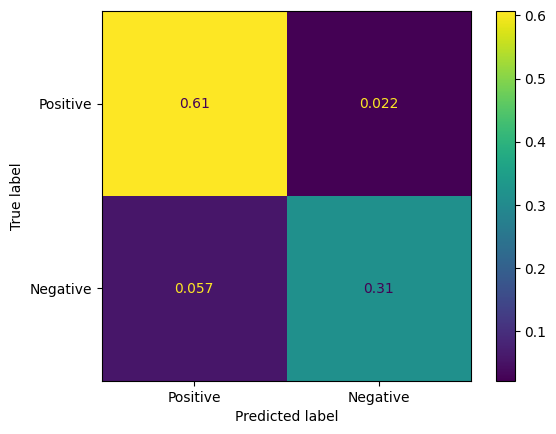

In [43]:
train_pred = knn.predict(X_train).astype(np.float32)
cm = confusion_matrix(y_train, train_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()

In [44]:
recall = recall_score(y_train, train_pred)
print(f"Recallscore voor trainset:    {recall:.4f}")

Recallscore voor trainset:    0.8462


## Confusion Matrix met Testset

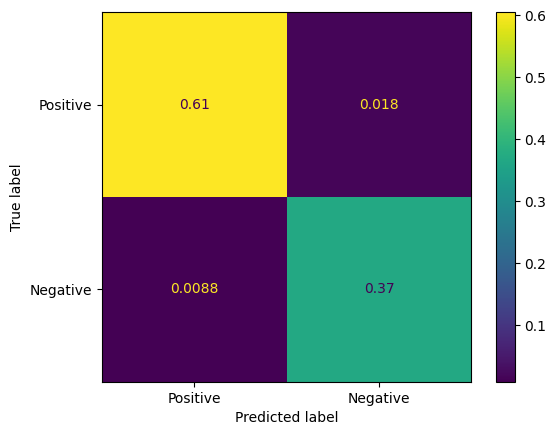

In [45]:
test_pred = knn.predict(X_test).astype(np.float32)
cm = confusion_matrix(y_test, test_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()

In [46]:
recall = recall_score(y_test, test_pred)
print(f"Recallscore voor testset:    {recall:.4f}")

Recallscore voor testset:    0.9767


Antwoord: Het verschil tussen de uitkomsten van de Confusion Matrix van train en test datasets zijn in ons geval niet heel groot, maar bij de recall score is het veel hoger bij de testset. Wij denken dat het komt doordat de test size veel kleiner is dan de trainset waardoor de KNN minder fouten maakt.

### K-Fold Cross Validatie

Pas k-fold cross validation toe op de traindataset. Zie ook: https://scikit-learn.org/stable/modules/cross_validation.html

In [75]:
for i in range(2, 11): # Hier gebruik ik cijfers van 2 tot en met 10 voor waarde k
    kf = KFold(n_splits=i, shuffle=True, random_state=42)
    cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='recall')
    print(f'Gemiddelde recall score van CV met {i} aantal splits: {np.round(cv_scores.mean(),2)}')

Gemiddelde recall score van CV met 2 aantal splits: 0.89
Gemiddelde recall score van CV met 3 aantal splits: 0.89
Gemiddelde recall score van CV met 4 aantal splits: 0.89
Gemiddelde recall score van CV met 5 aantal splits: 0.9
Gemiddelde recall score van CV met 6 aantal splits: 0.88
Gemiddelde recall score van CV met 7 aantal splits: 0.88
Gemiddelde recall score van CV met 8 aantal splits: 0.9
Gemiddelde recall score van CV met 9 aantal splits: 0.89
Gemiddelde recall score van CV met 10 aantal splits: 0.89


Welke waarde van k kies je en waarom?

Antwoord: In dit geval kiezen we de waarde 6 als k omdat dit de hoogste recallscore oplevert.

Lijkt het resultaat meer op de train of de testset?

Antwoord: Het resultaat van de K-Fold Cross Validatie lijkt in ons geval meer op de trainset.

### Underfit/Overfit

Maak een underfit model (slechte prestaties op train en test) en een overfit model (veel betere prestaties op train vergeleken met test). Leg uit (via tekst en een of meer visualisaties) hoe je dit kan zien. 

Let op: je maakt hier expres slechte modellen om te zien hoe veel controle over het presteren van het model je kan krijgen en te leren wat de verschillende hyperparameters kunnen opleveren. 

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Het is gelukt om een underfit- een overfitmodel te maken en er wordt duidelijk uitgelegd waaraan je dat kan zien. De rol van de train en testset wordt duidelijk uitgelegd. De resultaten worden onderbouwd met goede vizualisaties."

## Underfit model:

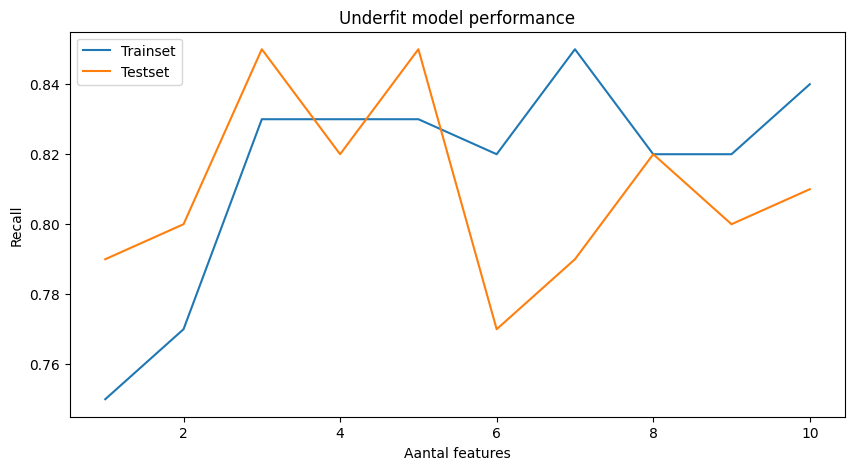

In [48]:
n_features = range(1, 11)
underfit_train = []
underfit_test = []
knn_underfit = KNeighborsClassifier(n_neighbors=10)
for i in n_features:
    X_underfit = X.iloc[:, :i]
    X_train, X_test, y_train, y_test = train_test_split(X_underfit, y, test_size=0.3)
    knn_underfit.fit(X_train, y_train)
    # Trainset
    y_pred = knn_underfit.predict(X_train)
    recall = recall_score(y_train, y_pred)
    underfit_train.append(np.round(recall, 2))
    # Testset
    y_pred = knn_underfit.predict(X_test)
    recall = recall_score(y_test, y_pred)
    underfit_test.append(np.round(recall, 2))



plt.figure(figsize=(10, 5))
plt.plot(n_features, underfit_train, label='Trainset')
plt.plot(n_features, underfit_test, label='Testset')
plt.xlabel("Aantal features")
plt.ylabel("Recall")
plt.legend()
plt.title("Underfit model performance")
plt.show()

In [49]:
print(f'Gemiddelde recallscore van underfit model op de trainset: {np.mean(underfit_train):.2f}')
print(f'Gemiddelde recallscore van underfit model op de testset: {np.mean(underfit_test):.2f}')

Gemiddelde recallscore van underfit model op de trainset: 0.82
Gemiddelde recallscore van underfit model op de testset: 0.81


Antwoord: je kunt zien dat dit een underfit model is omdat:
* De kloof tussen de prestaties van de train- en testsets zijn klein
* Recall score gaat niet omhoog als n_neighbors omhoog gaat


## Overfit model:

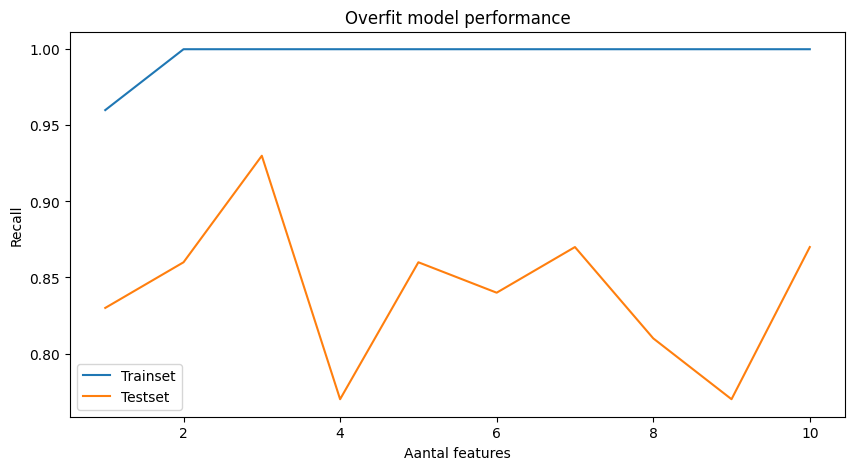

In [51]:
n_features = range(1, 11)
overfit_train = []
overfit_test = []
knn_overfit = KNeighborsClassifier(n_neighbors=1)
for i in n_features:
    X_overfit = X.iloc[:, :i]
    X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=0.3)
    knn_overfit.fit(X_train, y_train)
    # Trainset
    y_pred = knn_overfit.predict(X_train)
    recall = recall_score(y_train, y_pred)
    overfit_train.append(np.round(recall, 2))
    # Testset
    y_pred = knn_overfit.predict(X_test)
    recall = recall_score(y_test, y_pred)
    overfit_test.append(np.round(recall, 2))



plt.figure(figsize=(10, 5))
plt.plot(n_features, overfit_train, label='Trainset')
plt.plot(n_features, overfit_test, label='Testset')
plt.xlabel("Aantal features")
plt.ylabel("Recall")
plt.legend()
plt.title("Overfit model performance")
plt.show()

In [52]:
print(f'Gemiddelde recallscore van overfit model op de trainset: {np.mean(overfit_train):.2f}')
print(f'Gemiddelde recallscore van overfit model op de testset: {np.mean(overfit_test):.2f}')

Gemiddelde recallscore van overfit model op de trainset: 1.00
Gemiddelde recallscore van overfit model op de testset: 0.84


Antwoord: je kunt zien dat dit een overfit model is omdat:
* De kloof tussen de prestaties van de train- en testsets is groot
* De resultaten van de trainset is altijd beter dan die van de testset

### RandomizedSearch

Pas RandomizedSearchCV() toe op je model in scikit-learn, hiermee kan je de beste waarde voor je hyperparameters vinden. RandomizedSearchCV is een andere methode dan GridSearch. Zie hier voor meer informatie: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Let op: voor maximale punten moet je ook K-Fold Cross Validatie tegelijk gebruiken (wss in een pipeline...zie DataCamp).

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is RandomizedSearchCV() uitgevoerd en er wordt beargumenteerd waarom gekozen is voor bepaalde hyperparameters. Ook wordt benoemd welke hyperparameter uiteindelijk het beste lijkt te zijn en waarom, en er is besproken hoe k-foldcross validatie betrokken wordt in de RandomizedSearchCV()."

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
param_dist = {
    'knn__n_neighbors': range(1, 10)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Dit is de K-Fold object die we hieronder gaan gebruiken

random_search = RandomizedSearchCV(pipeline, param_dist, cv=kf, scoring='recall') # Wij gebruiken hier recall als score
random_search.fit(X, y)

print("Beste parameters:", random_search.best_params_) # Dit geeft de beste parameters op basis van de metric recall
print("Beste cross-val score:", random_search.best_score_)

Beste parameters: {'knn__n_neighbors': 1}
Beste cross-val score: 0.8387123220288032


Antwoord:
* Voor de param_dist hebben we gekozen om alleen de n_neighbors te gaan tunen, omdat andere parameters zoals 'weights' of 'metrics' geen invloed hebben op de testscores.
* De beste waarde voor n_neighbors uit de bovenstaande resultaat is 1, dit wordt bepaald door de parameter 'scoring' binnen de constructor van RandomizedSearchCV (In dit geval kijkt hij naar de waarde van n_neighbors met de hoogste recallscore).
* Voor de parameter cv binnen de constructor van RandomizedSearchCV hebben we 'kf' gebruikt, dat is dan de K-Fold object die we hebben aangemaakt. (Het is ook mogelijk om een getal te gebruiken, maar dan heb je de opties zoals shuffle en random_state niet)

### Definitief Model (Classificatie)

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er worden uitspraken gedaan over hoe goed de modellen werken. De onderbouwing is duidelijk en logisch. Ook is beargumenteerd waarom het model niet under- en overfit. Daarnaast komt naar voren waarom bepaalde features wel en niet in het uiteindelijke model zitten."

Test het model met de beste parameters op de testset. Hoe goed is het model?

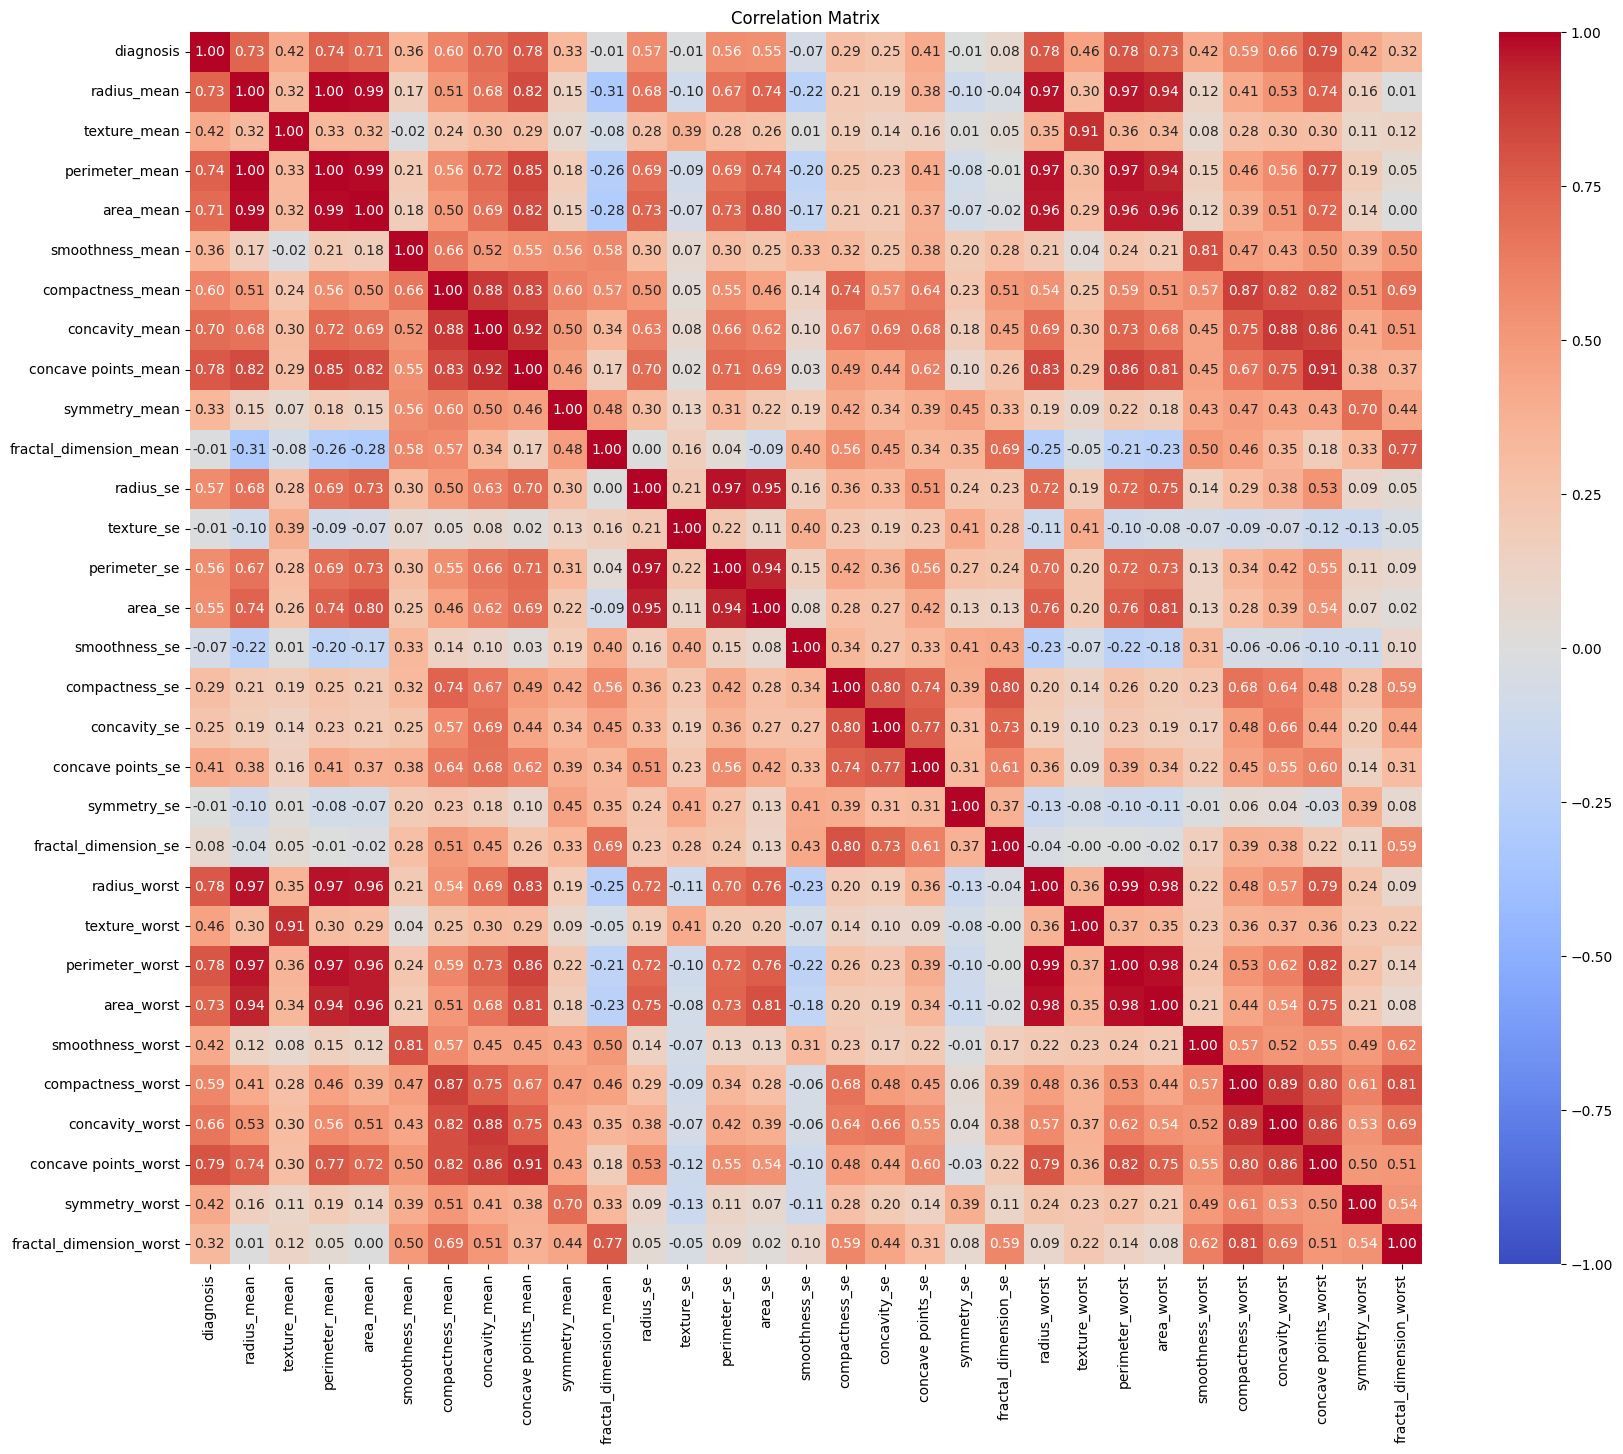

In [54]:
corr_matrix = data.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, vmax=1, vmin=-1) # Schaal van 1 tot -1
plt.title("Correlation Matrix")
plt.show()

## Opmerkingen:
In deze correlatie matrix kun je zien dat de negatief gecorreleerde kolommen niet heel sterk zijn, dus die slaan we over.

## Feature selection

In [55]:
correlations = corr_matrix['diagnosis'][1:] # Dit zijn alle kolommen en hun correlatie-sterkte met de diagnose van borstkanker (behalve diagnose zelf)
threshold = correlations[correlations.values > 0].values.mean() # Hier maken we een gemiddelde van de correlatie-sterkte van alle positief gecorreleerde kolommen
correlations = correlations[correlations.values > threshold] # Als de correlatie-sterkte van een kolom boven de gemaakte threshold komt, wordt dit kolom geselecteerd als de features voor de training
X = data[correlations.index]

## Model trainen en prestatie metrics bekijken

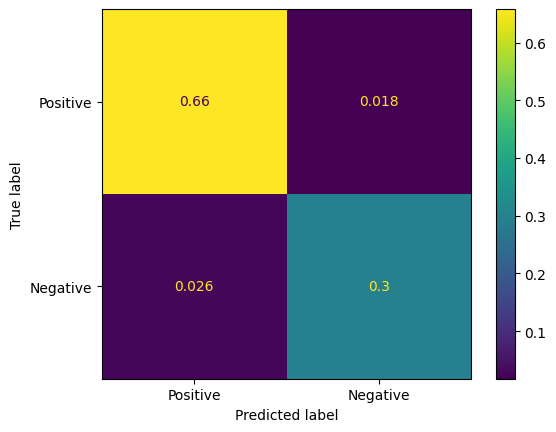

In [64]:
model = KNeighborsClassifier(n_neighbors=1) # Beste parameter 1 voor n_neighbors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()

In [65]:
recall = recall_score(y_test, y_pred)
print(f"Recallscore van definitieve model op testset:    {recall:.2f}")

Recallscore van definitieve model op testset:    0.92


In [66]:
train_pred = model.predict(X_train)

recall = recall_score(y_train, train_pred)
print(f"Recallscore van definitieve model op trainset:    {recall:.2f}")

Recallscore van definitieve model op trainset:    1.00


## Nacontrole voor under- en overfitting

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Beste waarde voor k: 5
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')

print(f"CV scores: {cv_scores}")
print(f"Gemiddelde CV accuracy: {cv_scores.mean():.2f}")

CV scores: [0.86046512 0.94594595 0.81395349 0.86046512 0.80434783]
Gemiddelde CV accuracy: 0.86


## Er is hier ook geen sprake van over- en underfitting want:
* Er is geen grote schommeling tussen de K-Fold cross-validatie scores
* Verschil tussen de recall score van de voorspelling op de test- en trainset zijn klein